In [51]:
import pandas as pd
import numpy as np

In [52]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact , interact_manual

from sklearn.linear_model import LogisticRegression

In [53]:
di = pd.read_csv('diabetes.csv')

# Exploring the dataset

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour serum insulin (mu U/ml)
- `BMI`: Body mass index (weight in kg/(height in m)2)
- `DiabetesPedigreeFunction`: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- `Age`: Age (years)
- `Outcome`: Class variable (0 if non-diabetic, 1 if diabetic) 


In [54]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
di.shape

(768, 9)

In [56]:
di.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
di[di.Outcome == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [58]:
di.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
di.duplicated().sum()

0

In [60]:
di.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Another representation of data types

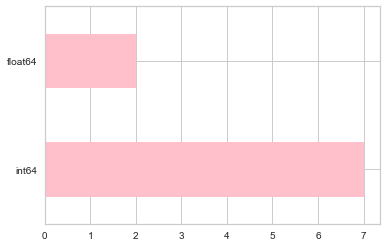

In [61]:
di.dtypes.value_counts().plot(kind='barh' , color='pink');

In [62]:
di.describe().T.style
#di.describe().transpose() <--- same T style 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768,3.84505,3.36958,0,1,3,6,17
Glucose,768,120.895,31.9726,0,99,117,140.25,199
BloodPressure,768,69.1055,19.3558,0,62,72,80,122
SkinThickness,768,20.5365,15.9522,0,0,23,32,99
Insulin,768,79.7995,115.244,0,0,30.5,127.25,846
BMI,768,31.9926,7.88416,0,27.3,32,36.6,67.1
DiabetesPedigreeFunction,768,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768,33.2409,11.7602,21,24,29,41,81
Outcome,768,0.348958,0.476951,0,0,0,1,1


#### You can see that the minimum values for many of these features are 0. In the case of pregnancies, this makes sense, but for things like glucose and blood pressure, 0 clearly does not make sense here. This means that missing values are represented using zeros in this data set.

In [63]:
# Replace all zeros with NaN 

di.Glucose.replace(0 , np.nan , inplace=True)
di.BloodPressure.replace(0 , np.nan , inplace=True)
di.SkinThickness.replace(0 , np.nan , inplace=True)
di.Insulin.replace(0 , np.nan , inplace=True)
di.BMI.replace(0 , np.nan , inplace=True)

In [64]:
di.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [65]:
!pip install missingno

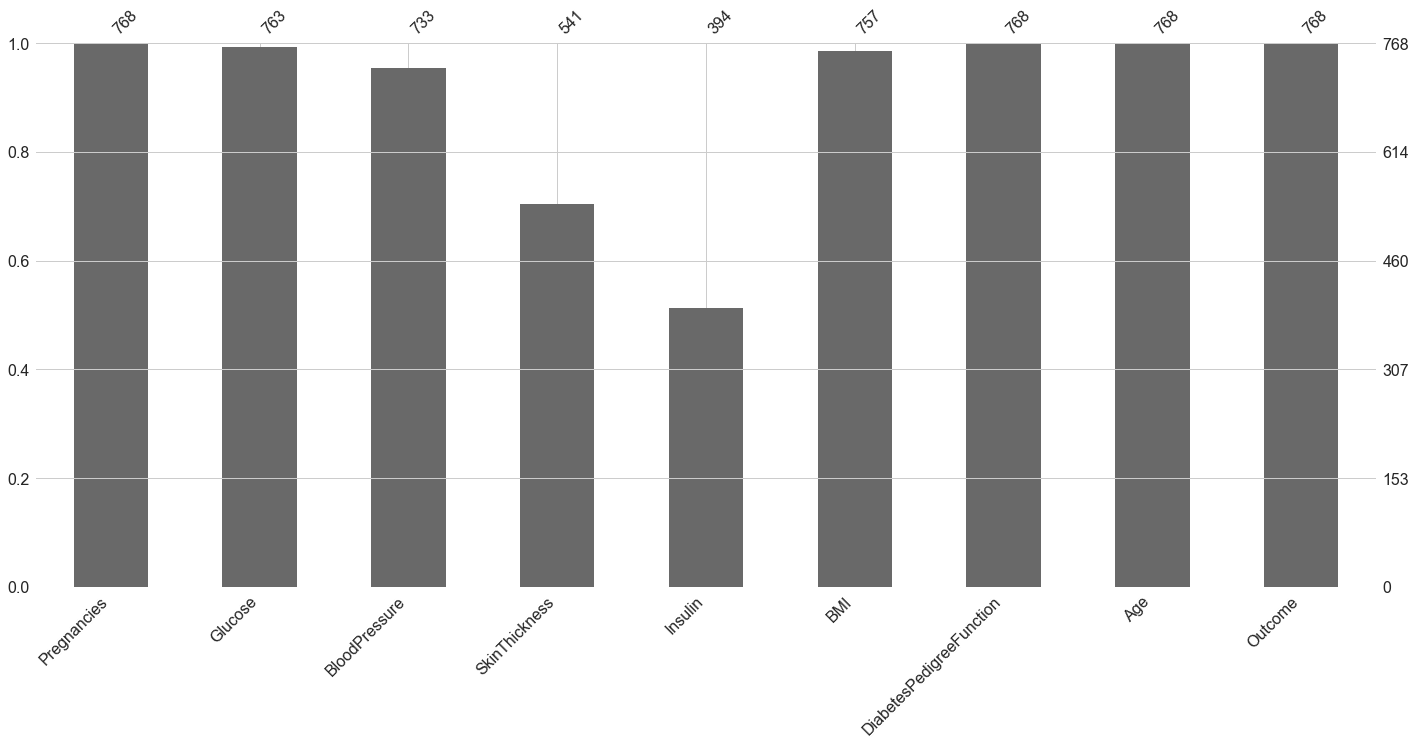

In [66]:
## null count analysis
import missingno as msno
p=msno.bar(di)
plt.savefig('missingno.png');

# Data Cleaning 

#### The SimpleImputer offers a number of basic strategies for imputing or inferring missing values. You can fill in using a constant, the mean of the existing data, median, mode, etc..

In [67]:
from sklearn.impute import SimpleImputer

I will fill SkinThickness missing values with the most frequent values

In [68]:
imp = SimpleImputer(missing_values = np.nan , strategy= 'most_frequent')
imp.fit(di['SkinThickness'].values.reshape(-1 , 1))

di['SkinThickness'] = imp.transform(di['SkinThickness'].values.reshape(-1 , 1))

The median represents the data point at the fiftieth percentile of our data and this is the data that I'll use to fill in missing values for glucose. 

In [69]:
imp = SimpleImputer(missing_values = np.nan , strategy= 'median')
imp.fit(di['Glucose'].values.reshape(-1 , 1))

di['Glucose'] = imp.transform(di['Glucose'].values.reshape(-1 , 1))

In BloodPressure I will use the mean to fill the missing values.

In [70]:
imp = SimpleImputer(missing_values = np.nan , strategy= 'mean')
imp.fit(di['BloodPressure'].values.reshape(-1 , 1))

di['BloodPressure'] = imp.transform(di['BloodPressure'].values.reshape(-1 , 1))

In BMI I'll use constant to fill values with 32, Thirty-two is the mean value for BMI in any case.

In [71]:
imp = SimpleImputer(missing_values = np.nan , strategy= 'constant' , fill_value=32)
imp.fit(di['BMI'].values.reshape(-1 , 1))

di['BMI'] = imp.transform(di['BMI'].values.reshape(-1 , 1))

In [72]:
di.BMI.mean()

32.45091145833331

When you use imputation techniques to fill in missing values, the statistical properties of your data will change and this is something that you need to be aware of.  In my situation, I don't want to drop records with missing values because I don't have very much data to work with

In [73]:
di.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now you can see that the only column with missing values is the insulin column. I'll deal with this column using a different imputation technique.

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

The imputer from scikit-learn that I'll use for multivariate feature imputation is called the Iterative Imputer. You can fit this Iterative Imputer on an entire data set where multiple columns have missing values. It'll model each feature with missing values as a function of other features. 

In [75]:
feature = di.drop('Outcome', axis=1)
label =di[['Outcome']]

I'll instantiate the Iterative Imputer estimator object and I'll run it for a maximum of 1000 iterations and I've initialized it with a random state of 0, that's just to replicate these results.

In [76]:
imp = IterativeImputer(max_iter=1000 , random_state=0)

In [77]:
imp.fit(feature)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=1000, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [78]:
diabetes_arr = imp.transform(feature)

In [79]:
diabetes_arr.shape

(768, 8)

In [80]:
feature = pd.DataFrame(diabetes_arr, columns= feature.columns)
feature.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [81]:
di = pd.concat([feature , label] , axis= 1 )

di.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [82]:
di.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes as shown in the chart below.


![rate](Images/rate.jpg)



In [83]:
@interact 
def pregnancies_more_than (column = 'Glucose' , x=150):
    return di.loc[di[column] >= x]

interactive(children=(Text(value='Glucose', description='column'), IntSlider(value=150, description='x', max=4…

Save the cleaned dataset as a new dataset

In [84]:
di.to_csv('diabetes_cleaned.csv' , index=False) 

# Data visualization

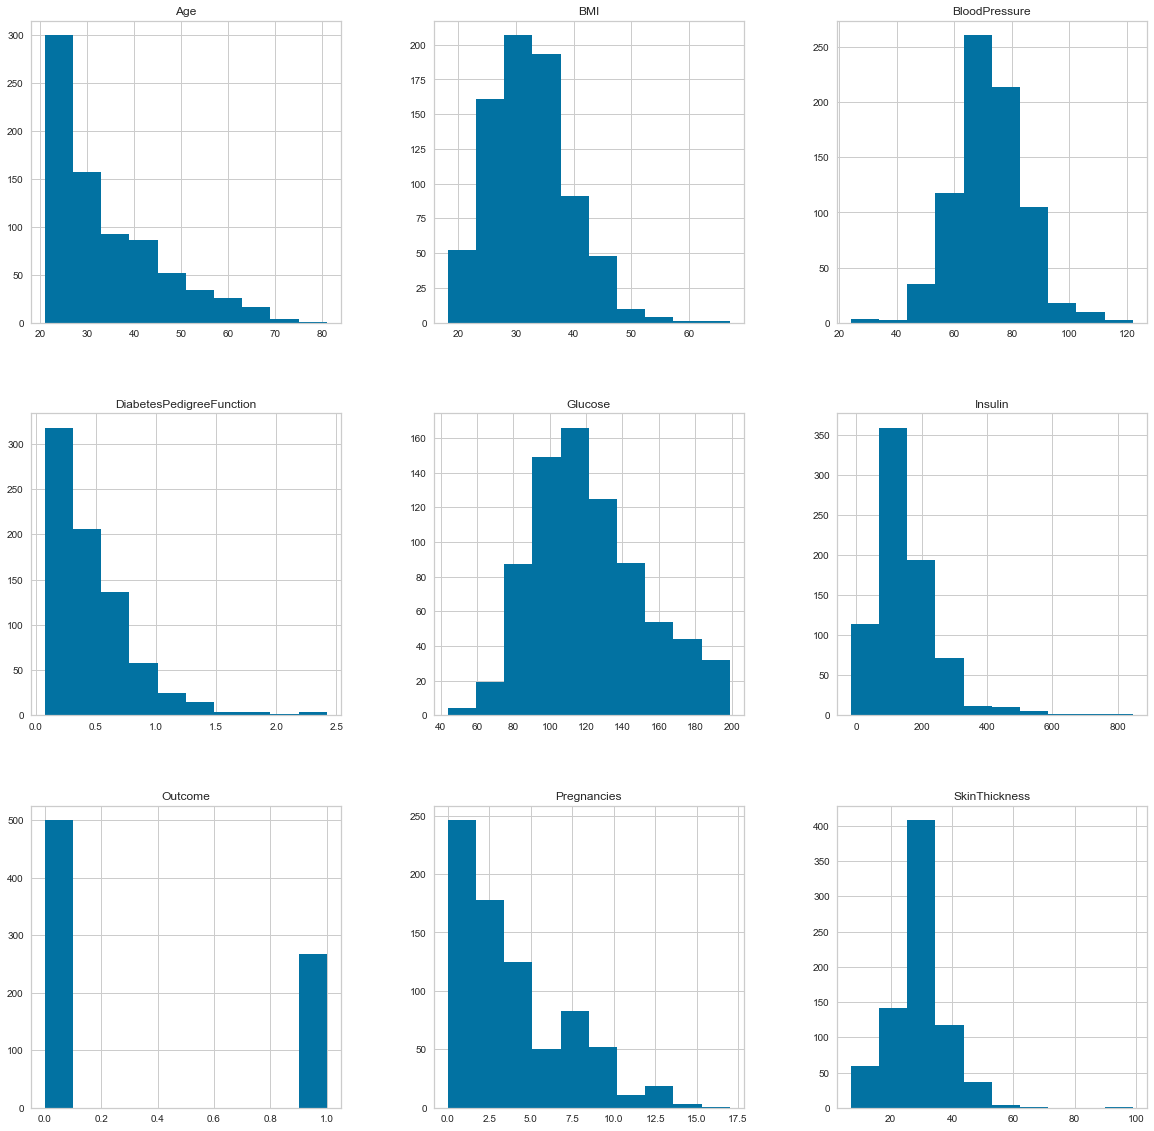

In [85]:
di.hist(figsize = (20,20));

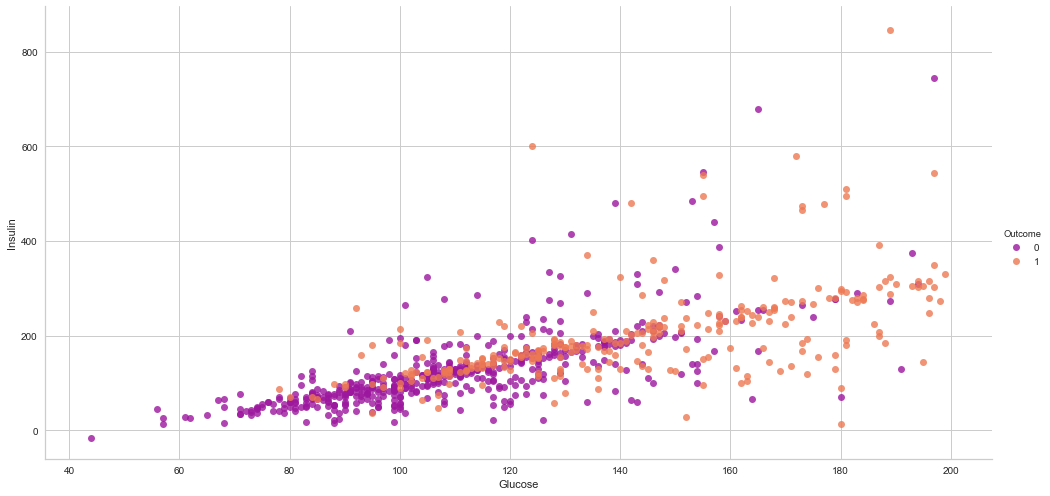

In [86]:
sns.lmplot(x='Glucose', y='Insulin', hue='Outcome', data=di , fit_reg=False , palette='plasma' , 
    height=7,
    aspect=2,  );

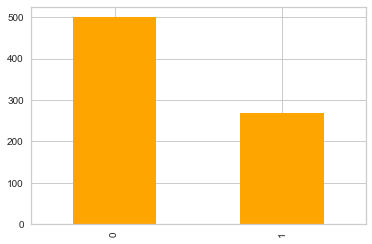

In [87]:
di.Outcome.value_counts().plot(kind='bar' , color='orange')  ;

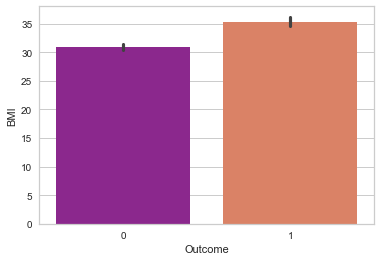

In [88]:
sns.barplot(x='Outcome' ,y='BMI', data=di, 
            palette='plasma');

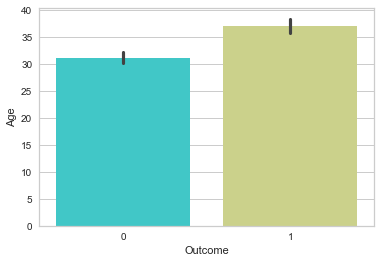

In [89]:
sns.barplot(x='Outcome' ,y='Age', data=di, 
            palette='rainbow');

In [90]:
di.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208522,0.104428,0.069769,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218749,0.196435,0.697793,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208522,0.218749,1.000000,0.208295,0.128439,0.281063,-0.002763,0.324595,0.166074
SkinThickness,0.104428,0.196435,0.208295,1.000000,0.203299,0.522159,0.077395,0.158825,0.220678
Insulin,0.069769,0.697793,0.128439,0.203299,1.000000,0.268167,0.134505,0.215751,0.357815
BMI,0.021546,0.231400,0.281063,0.522159,0.268167,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002763,0.077395,0.134505,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324595,0.158825,0.215751,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.166074,0.220678,0.357815,0.312249,0.173844,0.238356,1.000000


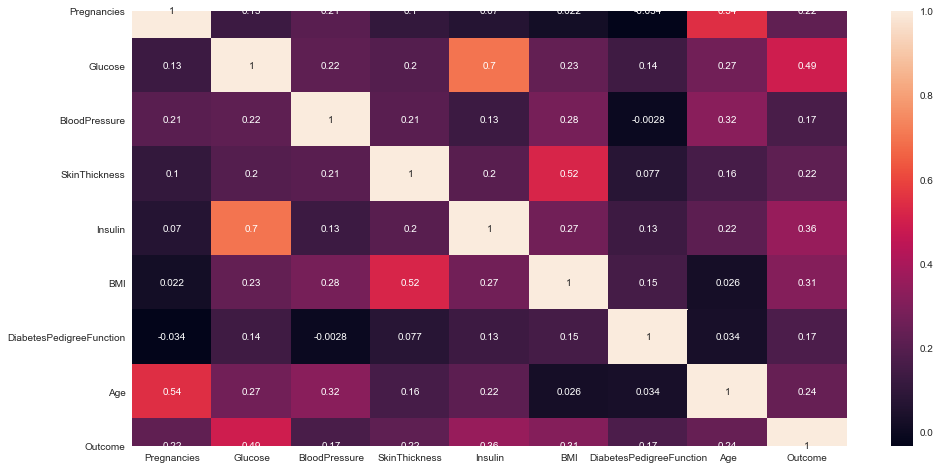

In [91]:
plt.figure(figsize=(16 , 8))
sns.heatmap(di.corr() , annot= True);
plt.savefig('corr.png');

#### I'll install Yellow Brick library, Yellow Brick offers analysis tools in order to select the right features to train your model.

In [92]:
!pip install yellowbrick

In [93]:
x = di[['Insulin' , 'Age' , 'BloodPressure' , 'DiabetesPedigreeFunction' , 'Pregnancies' , 'Glucose' , 'BMI' ]]
y = di ['Outcome']

In [94]:
feature_name = x.columns
feature_name.values

array(['Insulin', 'Age', 'BloodPressure', 'DiabetesPedigreeFunction',
       'Pregnancies', 'Glucose', 'BMI'], dtype=object)

C:\Users\aSusTouch\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


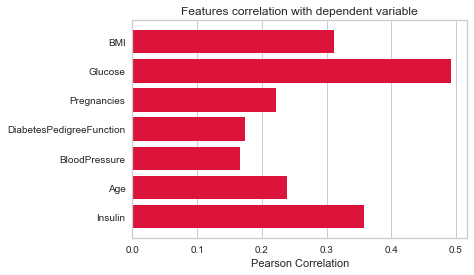

<Figure size 432x288 with 0 Axes>

In [95]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels= feature_name , method='pearson' , color= 'crimson')

visualizer.fit(x , y)
visualizer.poof()
plt.savefig('yellow.png');

Insulin, Glucose and blood pressure has a high correlation with BMI

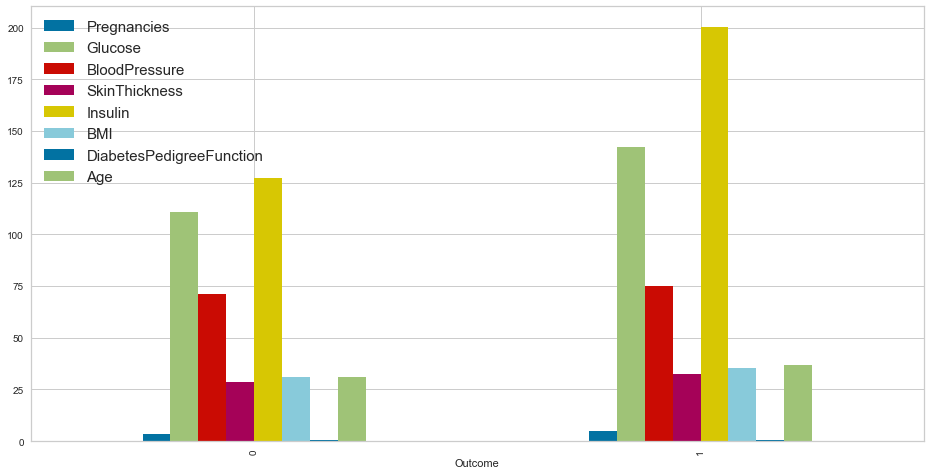

In [96]:
da = di.groupby('Outcome').mean().plot(kind='bar' , figsize=(16 , 8) );
da.legend(loc=2 , prop={'size': 15});
plt.savefig('outcome.png');

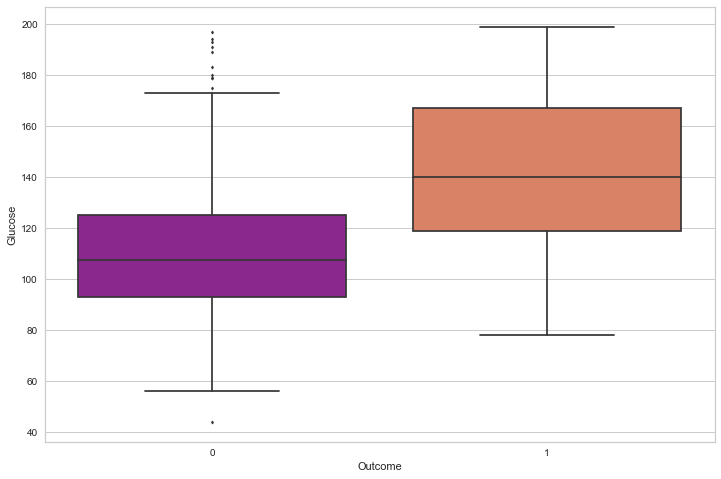

In [97]:
plt.figure(figsize=(12,8))
plotbox1 = di.groupby(['Outcome'])['Glucose'].median().sort_values() 
sns.boxplot(x=di['Outcome'], y=di['Glucose'], order=list(plotbox1.index) , palette='plasma' , fliersize=2);

<Figure size 864x432 with 0 Axes>

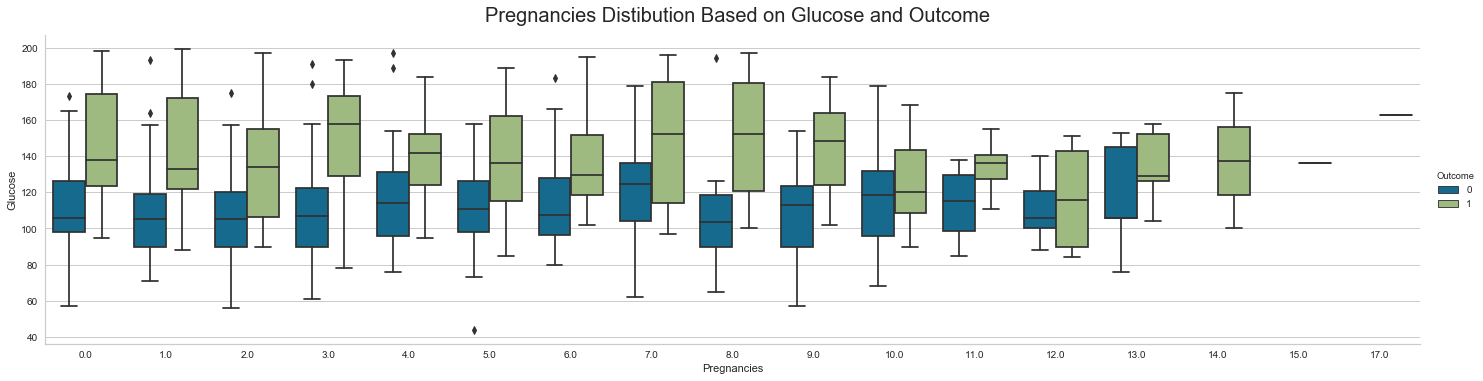

In [98]:
#g5c = sns.catplot( x="Pregnancies",y="Insulin",hue='Outcome',data=di, kind="box", aspect=4,legend_out=True ,col="Outcome", row_order=["Yes", "No"]  );
#g5c.fig.suptitle("Pregnancies Distibution Based on Insulin and Outcome", y=1.05,size=20);
plt.figure(figsize=(12,6))

g5c = sns.catplot( x="Pregnancies",y="Glucose",hue='Outcome',data=di, kind="box", aspect=4,legend_out=True );
g5c.fig.suptitle("Pregnancies Distibution Based on Glucose and Outcome", y=1.05,size=20);

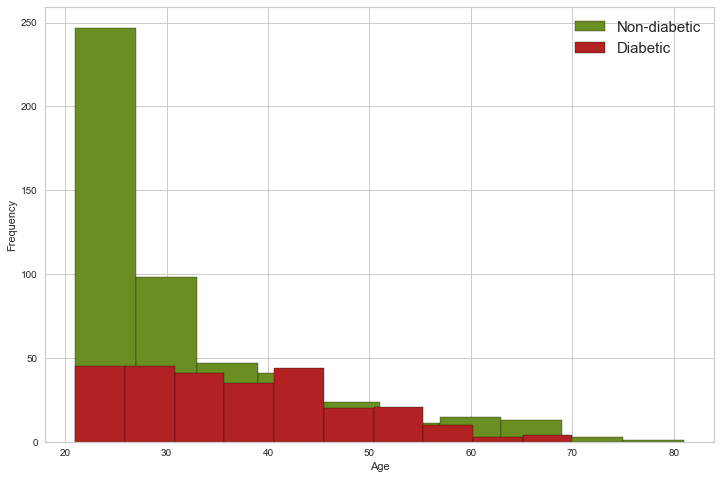

In [99]:
plt.figure(figsize=(12,8))

plt.hist(list(di[di['Outcome']==0]['Age']), ec = 'black' , color='olivedrab');

plt.hist(list(di[di['Outcome']==1]['Age']), ec = 'black' , color='firebrick');

plt.legend({'Non-diabetic' : '0' , 'Diabetic' : '1'} , prop={'size': 15})
plt.ylabel('Frequency'), plt.xlabel('Age');



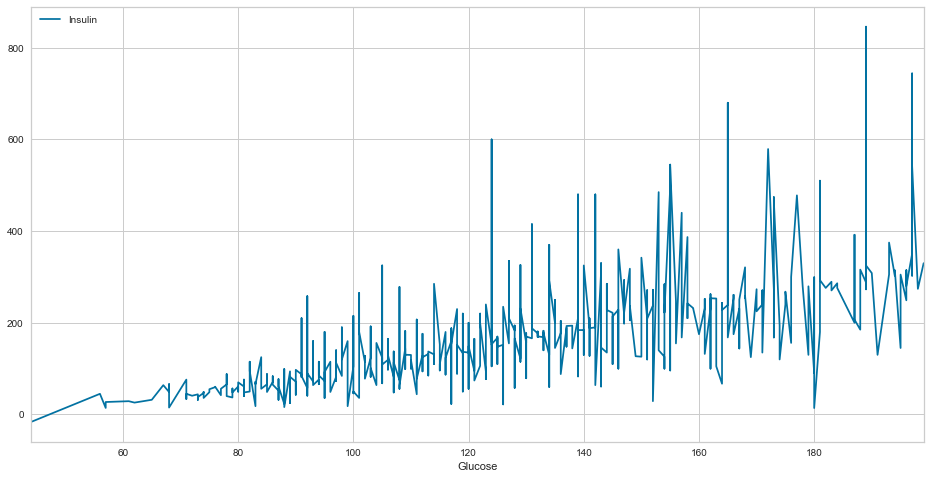

In [100]:
di.sort_values('Glucose').plot.line(x='Glucose', y='Insulin' , figsize=(16,8))